# Import Library

In [1]:
import tensorflow as tf
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import RNNLatentAttention

# Load Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


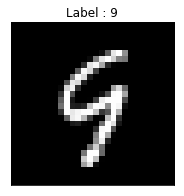

In [4]:
# Check data
idx = 9
train_x, train_y = mnist.train.next_batch(10)
img = train_x[idx,:].reshape(28, 28)

plt.figure(figsize=(5, 3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[idx])))
plt.xticks([])
plt.yticks([])
plt.show()

# Build RNN

In [4]:
n_step = 14
n_input = 28

## LSTM shape
n_lstm1 = 128
n_lstm2 = 258

## Fully connected
n_hidden1 = 100
n_output = 28
n_labels = 10

# RNN Model(save,load)

In [5]:
config = {
    'ID' : 'test_RNN_class',
    'n_iter' : 1000,
    'n_prt' : 100,
    'n_input' : 28,
    'n_step' : 14,
    'n_output' : 28,
    'n_batch' : 50,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 0.0002
}

In [6]:
my_rnn = RNNLatentAttention.RNN(config=config)

[FileExistsError] Will you remove directory? [Y/N] Y
Model ID : test_RNN_class
Model saved at : ./test_RNN_class


In [7]:
my_rnn.fit(mnist)

Your loss (100/1000) : 0.0032370362896472216
Your loss (200/1000) : 0.0021850201301276684
Your loss (300/1000) : 0.0020245423074811697
Your loss (400/1000) : 0.002888420596718788
Your loss (500/1000) : 0.001154248253442347
Your loss (600/1000) : 0.003264973871409893
Your loss (700/1000) : 0.0008948213653638959
Your loss (800/1000) : 0.002606755355373025
Your loss (900/1000) : 0.0011273352429270744
Your loss (1000/1000) : 0.002530268393456936
INFO:tensorflow:./test_RNN_class/checkpoint/test_RNN_class_1000 is not in all_model_checkpoint_paths. Manually adding it.


In [5]:
config2 = {
    'ID' : 'Output',
    'n_iter' : 1000,
    'n_prt' : 100,
    'n_input' : 28,
    'n_step' : 14,
    'n_output' : 28,
    'n_batch' : 50,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 0.0002
}

In [6]:
test_rnn = RNNLatentAttention.RNN(config=config2)

[FileExistsError] Will you remove directory? [Y/N] Y
Model ID : Output
Model saved at : ./Output


In [7]:
test_rnn.load('./test_RNN_class/checkpoint/test_RNN_class_1000')

INFO:tensorflow:Restoring parameters from ./test_RNN_class/checkpoint/test_RNN_class_1000
Model loaded from file : ./test_RNN_class/checkpoint/test_RNN_class_1000


In [8]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

sample = test_x[0, 0:14,:]

gen_img = test_rnn.predict(sample)

In [17]:
gen_img_clip = np.clip(gen_img, 0.9, 1)

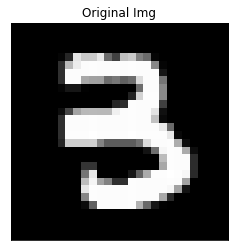

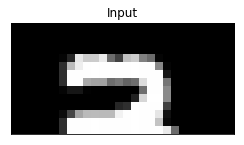

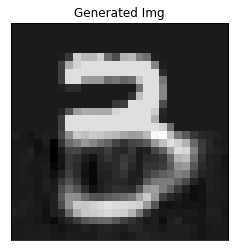

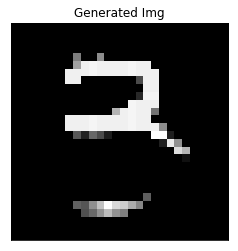

In [26]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

sample = test_x[0, 0:14,:]

gen_img = test_rnn.predict(sample)
gen_img_clip = np.clip(gen_img, 0.8, 1)

plt.imshow(test_x[0], 'gray')
plt.title('Original Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(sample, 'gray')
plt.title('Input')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(gen_img, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(gen_img_clip, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()

# Feature map

In [28]:
feature_dic = test_rnn.feature

In [29]:
lstm1_h = feature_dic['lstm1_h']
lstm1_c = feature_dic['lstm1_c']
lstm2_h = feature_dic['lstm2_h']
lstm2_c = feature_dic['lstm2_c']

In [30]:
tmp_input = sample.reshape(1, 14, 28)

In [31]:
val_lstm1_h = test_rnn.sess.run(lstm1_h, feed_dict={test_rnn.x:tmp_input})
val_lstm1_c = test_rnn.sess.run(lstm1_c, feed_dict={test_rnn.x:tmp_input})
val_lstm2_h = test_rnn.sess.run(lstm2_h, feed_dict={test_rnn.x:tmp_input})
val_lstm2_c = test_rnn.sess.run(lstm2_c, feed_dict={test_rnn.x:tmp_input})

In [32]:
print(val_lstm1_c.h.shape)
print(val_lstm1_c.c.shape)
print(val_lstm2_c.h.shape)
print(val_lstm2_c.c.shape)

(1, 128)
(1, 128)
(1, 256)
(1, 256)


In [39]:
np.min(abs(val_lstm1_c.c))

0.0040083104

In [33]:
val_lstm1_c.c

array([[-1.10724926e-01,  3.35071117e-01,  2.62125641e-01,
        -2.06290483e-01, -4.40824419e-01,  5.43473482e-01,
        -2.79693604e-01, -6.56329155e-01,  4.05213642e+00,
         7.71377161e-02,  6.53558224e-02, -1.54142380e+00,
         2.43670762e-01, -7.03909099e-01, -1.30483940e-01,
        -7.23654270e-01,  1.35438442e+00,  6.81020141e-01,
         7.81808734e-01, -3.31742585e-01,  3.94058037e+00,
        -5.81723332e-01, -5.36649004e-02, -7.26382017e-01,
         1.31993163e-02, -1.19221993e-01, -5.68198301e-02,
         2.25435114e+00, -3.47830772e-01, -7.44345427e-01,
         3.04516882e-01, -4.91318882e-01,  1.14968681e+00,
        -1.85723090e+00, -5.56843877e-01,  3.40902537e-01,
         1.37560725e+00,  5.39061010e-01, -3.58988494e-01,
         8.13026950e-02,  6.05895102e-01,  6.74771309e-01,
         5.08064628e-01, -1.31647289e-01,  4.15260881e-01,
        -1.05016232e+00, -1.94666043e-01,  1.12156697e-01,
        -7.55527020e-02,  1.26716828e+00, -2.56855249e-0

In [34]:
val_lstm1_c.h

array([[-0.10541942,  0.21506205,  0.24542369, -0.20126231, -0.4131161 ,
         0.44288945, -0.11359196, -0.2572259 ,  0.7073792 ,  0.05085625,
         0.06514113, -0.26341918,  0.21036778, -0.45586625, -0.05310346,
        -0.23372722,  0.6945408 ,  0.14332436,  0.4599558 , -0.12692861,
         0.7064197 , -0.20325927, -0.05352566, -0.28106987,  0.01297818,
        -0.09597316, -0.05665883,  0.4697801 , -0.33337122, -0.60187024,
         0.29466602, -0.4491862 ,  0.6662256 , -0.6980951 , -0.21285298,
         0.32798442,  0.58646005,  0.24373592, -0.34153512,  0.07004026,
         0.45787284,  0.3678174 ,  0.36984745, -0.13035911,  0.22099358,
        -0.46792755, -0.18277326,  0.11149323, -0.04704001,  0.67427754,
        -0.25120673, -0.24930204,  0.0065079 ,  0.17445767, -0.17788132,
        -0.4357288 ,  0.14884746,  0.19264662, -0.2123735 , -0.34716788,
        -0.36342812, -0.34209183,  0.423241  , -0.01923198, -0.13227294,
         0.4625382 , -0.19642209,  0.12160487,  0.0

In [35]:
val_lstm1_h[:,-1,:]

array([[-0.10541942,  0.21506205,  0.24542369, -0.20126231, -0.4131161 ,
         0.44288945, -0.11359196, -0.2572259 ,  0.7073792 ,  0.05085625,
         0.06514113, -0.26341918,  0.21036778, -0.45586625, -0.05310346,
        -0.23372722,  0.6945408 ,  0.14332436,  0.4599558 , -0.12692861,
         0.7064197 , -0.20325927, -0.05352566, -0.28106987,  0.01297818,
        -0.09597316, -0.05665883,  0.4697801 , -0.33337122, -0.60187024,
         0.29466602, -0.4491862 ,  0.6662256 , -0.6980951 , -0.21285298,
         0.32798442,  0.58646005,  0.24373592, -0.34153512,  0.07004026,
         0.45787284,  0.3678174 ,  0.36984745, -0.13035911,  0.22099358,
        -0.46792755, -0.18277326,  0.11149323, -0.04704001,  0.67427754,
        -0.25120673, -0.24930204,  0.0065079 ,  0.17445767, -0.17788132,
        -0.4357288 ,  0.14884746,  0.19264662, -0.2123735 , -0.34716788,
        -0.36342812, -0.34209183,  0.423241  , -0.01923198, -0.13227294,
         0.4625382 , -0.19642209,  0.12160487,  0.0

In [32]:
print(val_lstm1_h.shape)
print(val_lstm2_h.shape)

(1, 14, 128)
(1, 14, 256)


In [ ]:
config3 = {
    'ID' : 'Hanwha_RNN',
    'n_iter' : 5000,
    'n_prt' : 100,
    'n_input' : 28,
    'n_step' : 14,
    'n_output' : 28,
    'n_batch' : 50,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 0.0002
}

In [ ]:
hanwha_rnn = RNN(config=config3)

In [ ]:
hanwha_rnn.load('./test_RNN/checkpoint/test_RNN_1000')

In [ ]:
hanwha_rnn.fit(mnist)

In [ ]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

sample = test_x[0, 0:14,:]

gen_img = hanwha_rnn.predict(sample)

plt.imshow(test_x[0], 'gray')
plt.title('Original Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(sample, 'gray')
plt.title('Input')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(gen_img, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
config3 = {
    'ID' : 'Hanwha_RNN2',
    'n_iter' : 5000,
    'n_prt' : 100,
    'n_input' : 28,
    'n_step' : 14,
    'n_output' : 28,
    'n_batch' : 50,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 0.0002
}

In [ ]:
mm = RNN(config=config3)

In [ ]:
mm.load('./Hanwha_RNN/checkpoint/Hanwha_RNN_2000')

In [ ]:
test_x, test_y = mnist.test.next_batch(10)
test_x = test_x.reshape(-1, 28, 28)

sample = test_x[0, 0:14,:]

gen_img = mm.predict(sample)

plt.imshow(test_x[0], 'gray')
plt.title('Original Img')
plt.xticks([])
plt.yticks([])
plt.show()

plt.figure(figsize=(4,3))
plt.imshow(sample, 'gray')
plt.title('Input')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(gen_img, 'gray')
plt.title('Generated Img')
plt.xticks([])
plt.yticks([])
plt.show()